# CS 5483 Network Science

## Project 5 Fall 2021

### Due: December 4 (Saturday)

In [ ]:
# Required Header
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## This project is on the topics covered in Chapter 9 - Module 6 Lectures

### Generate $10$ random graphs (undireted) each with $20$ nodes - Use $G(n,m)$ model; Do the steps below for $m=10, m= 20, m = 30$, and $m=100$

In [ ]:
UG1 = nx.gnm_random_graph(20, 10)
UG2 = nx.gnm_random_graph(20, 20)
UG3 = nx.gnm_random_graph(20, 30)
UG4 = nx.gnm_random_graph(20, 40)
UG5 = nx.gnm_random_graph(20, 50)
UG6 = nx.gnm_random_graph(20, 60)
UG7 = nx.gnm_random_graph(20, 70)
UG8 = nx.gnm_random_graph(20, 80)
UG9 = nx.gnm_random_graph(20, 90)
UG10 = nx.gnm_random_graph(20, 100)

### Draw each of the $10$ random graphs

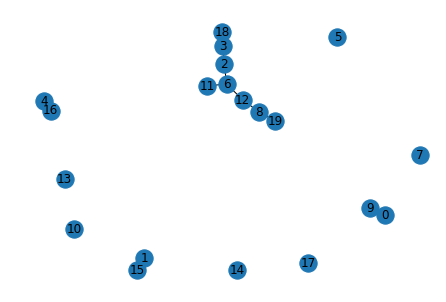

In [ ]:
nx.draw(UG1,with_labels=True)

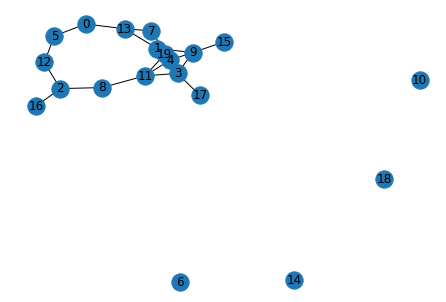

In [ ]:
nx.draw(UG2,with_labels=True)

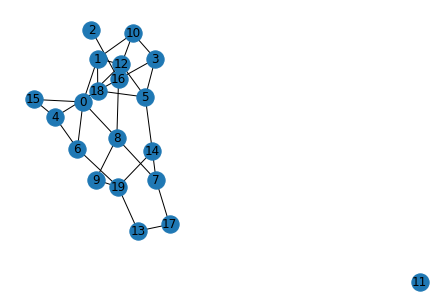

In [ ]:
nx.draw(UG3,with_labels=True)

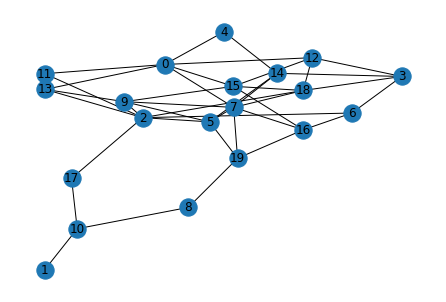

In [ ]:
nx.draw(UG4,with_labels=True)

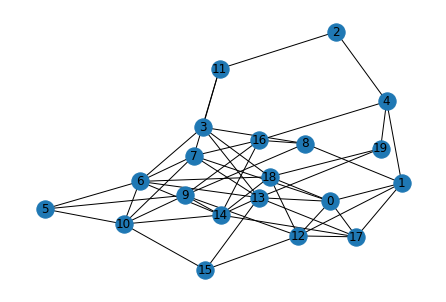

In [ ]:
nx.draw(UG5,with_labels=True)

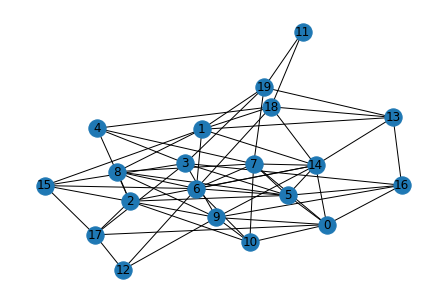

In [ ]:
nx.draw(UG6,with_labels=True)

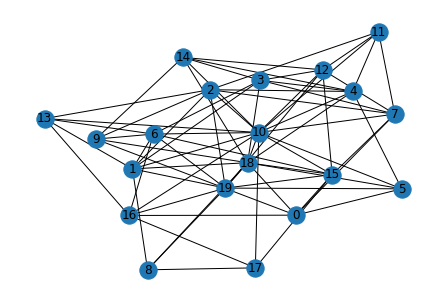

In [ ]:
nx.draw(UG7,with_labels=True)

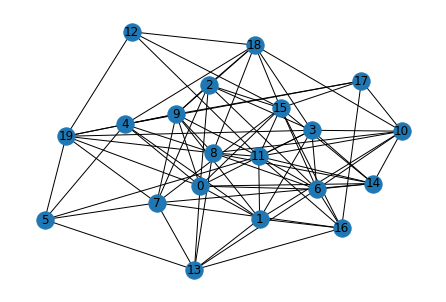

In [ ]:
nx.draw(UG8,with_labels=True)

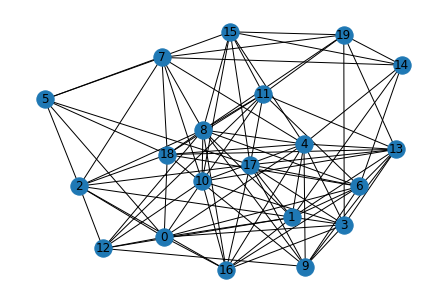

In [ ]:
nx.draw(UG9,with_labels=True)

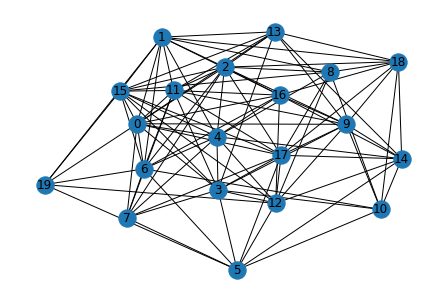

In [ ]:
nx.draw(UG10,with_labels=True)

### Create a Probability Matrix Q for the 10 random graphs; Calculate $Q_{ij}$ as presented in Module 6.
### The initial values of $\rho=0.3$, $\alpha=0.6$, $\beta=0.3$.

In [ ]:
p = 0.3
a = 0.6
b = 0.3
# Get all the adjacency matrix for 10 graphes.
A1 = nx.adjacency_matrix(UG1)
matA1 = A1.todense()
A2 = nx.adjacency_matrix(UG1)
matA2 = A2.todense()
A3 = nx.adjacency_matrix(UG3)
matA3 = A3.todense()
A4 = nx.adjacency_matrix(UG4)
matA4 = A4.todense()
A5 = nx.adjacency_matrix(UG5)
matA5 = A5.todense()
A6 = nx.adjacency_matrix(UG6)
matA6 = A6.todense()
A7 = nx.adjacency_matrix(UG7)
matA7 = A7.todense()
A8 = nx.adjacency_matrix(UG8)
matA8 = A8.todense()
A9 = nx.adjacency_matrix(UG9)
matA9 = A9.todense()
A10 = nx.adjacency_matrix(UG10)
matA10 = A10.todense()
# The Eij matrix will be:
matEij = matA1 + matA2 + matA3+ matA4+ matA5+ matA6+ matA7+ matA8+ matA9+ matA10 

In [165]:
# There are 10 graphes, so the observation times Nij is 10 for all the nodes
Eij = np.array(matEij)
Nij = 10
Qij = np.zeros(shape=(20,20)) 
# Calculate Qij:
for i in range(0, 20):
  for j in range(0, 20):
    Qij[i][j] = (p*a**Eij[i][j]*(1-a)**(10-Eij[i][j]))/(p*a**Eij[i][j]*(1-a)**(10-Eij[i][j])+(1-p)*b**Eij[i][j]*(1-b)**(10-Eij[i][j]))

### Do the following steps a)-b) 5 times

#### a) Calculate $\alpha$, $\beta$, and $\rho$ by observing the each edge $E_{ij}$ in each of the $10$ graphs that you generated

In [166]:
# Calculate α
a1nu = 0
a1de = 0
for i in range(0,20):
  for j in range(0, 20):
    if (i < j):
      a1nu = a1nu + Qij[i][j]*Eij[i][j]
      a1de = a1de + Qij[i][j]
a1 = a1nu/(a1de*Nij)
# Calculate β
b1 = a1
# Calculate ρ
n = 20
q = 0
for i in range(0,20):
  for j in range(0, 20):
    if (i < j):
      q = q + Qij[i][j]
p1 = (1/(n*(n-1)/2))*q

In [167]:
print("The new α,β,andρ is %.2f, %.2f, %.2f." % (a1, b1, p1))

The new α,β,andρ is 0.43, 0.43, 0.11.


#### b) Use the new values of $\alpha$, $\beta$, and $\rho$ calculated in step a) to determine new Probability Matrix Q

In [169]:
Qij1 = np.zeros(shape=(20,20))
# Calculate the new Probability Matrix Q:
for i in range(0,20):
  for j in range(0, 20):
    Qij1[i][j] = (p1*a1**Eij[i][j]*(1-a1)**(10-Eij[i][j]))/(p1*a1**Eij[i][j]*(1-a1)**(10-Eij[i][j])+(1-p1)*b1**Eij[i][j]*(1-b1)**(10-Eij[i][j]))

### Use the probability matrix Q to generate an adjacency matrix M. $M_{ij}=1$, if $Q_{ij} > 0.5$, $0$ otherwise.

In [170]:
Mij = np.zeros(shape=(20,20))
for i in range(0,20):
  for j in range(0, 20):
    if (Qij[i][j] > 0.5):
      Mij[i][j] = 1

### Use the adjacency matrix M to draw the network

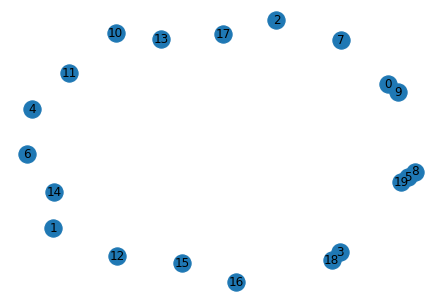

In [173]:
M = nx.from_numpy_matrix(Mij)
nx.draw(M,with_labels=True)